<a href="https://colab.research.google.com/github/adityarajesh010/IITG_Mod_2_final/blob/main/IITG_mod_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# === Dataset Information ===
Shape: (400, 4)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   glucose_level  400 non-null    float64
 1   bmi            400 non-null    float64
 2   age            400 non-null    int64  
 3   diabetes_risk  400 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.6 KB
None

Class distribution:
 {1: 221, 0: 179}

# === Data Split ===
Train shapes: (300, 3) (300, 1)
Test shapes: (100, 3) (100, 1)

# === Initialization ===
Weights shape: (3, 1)
Bias: 0.0
Learning rate: 0.01
Epochs: 100
Epoch   1/100 - Loss: 0.693147
Epoch  10/100 - Loss: 15.187053
Epoch  20/100 - Loss: 17.729316
Epoch  30/100 - Loss: 15.858760
Epoch  40/100 - Loss: 16.922389
Epoch  50/100 - Loss: 13.004028
Epoch  60/100 - Loss: 17.191512
Epoch  70/100 - Loss: 16.381441
Epoch  80/100 - Loss: 14.224500
Epoch  90/100 

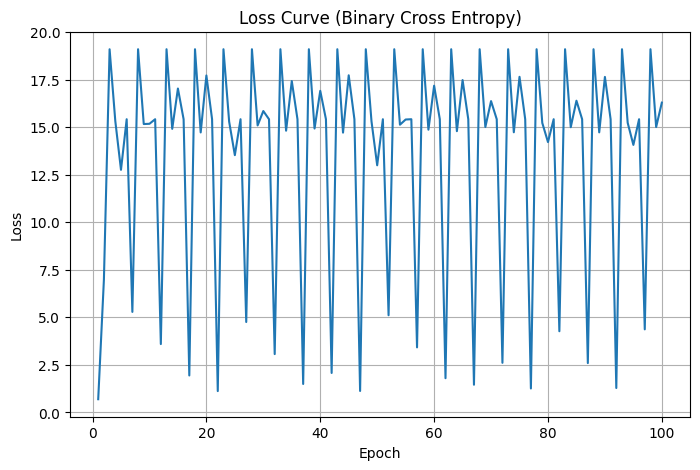


# === OUTPUTS ===

Dataset Information:
Shape: (400, 4)
Class distribution: {1: 221, 0: 179}

Data Split:
Train shapes: (300, 3) (300, 1)
Test shapes: (100, 3) (100, 1)

Initialization:
Weights shape: (3, 1)
Bias: -0.037
Learning rate: 0.01
Epochs: 100

Training Complete:
Final Weights:
 [[0.5503], [0.0088], [0.2513]]
Final Bias: -0.037
Final Loss: 16.301392

Threshold Analysis Table:
 threshold  accuracy  precision  recall     f1
       0.3      0.55       0.55     1.0 0.7097
       0.5      0.55       0.55     1.0 0.7097
       0.7      0.55       0.55     1.0 0.7097

Recommended Threshold: 0.3
Justification: Chosen because it achieves the highest F1 score balancing precision and recall on the test set.


In [ ]:
# Logistic Regression from scratch for diabetes risk prediction
# Includes: data loading, sigmoid, BCE loss, gradient computation, training loop,
# threshold analysis (0.3, 0.5, 0.7), selection by F1, and loss curve visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

# === Load dataset ===
df = pd.read_csv('/content/diabetes_risk.csv')

print("# === Dataset Information ===")
print("Shape:", df.shape)
print("\nDataset info:")
print(df.info())

# Class distribution
print("\nClass distribution:\n", df['diabetes_risk'].value_counts().to_dict())

# === Data Preparation ===
X = df[['glucose_level', 'bmi', 'age']].values  # features
y = df['diabetes_risk'].values.reshape(-1, 1)   # target as column vector

# Split into 75% train and 25% test with random_state=42 (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\n# === Data Split ===")
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

# === Core Functions ===
def sigmoid(z):
    # Numerically stable sigmoid
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    # y_true and y_pred are column vectors (n,1)
    eps = 1e-15
    p = np.clip(y_pred, eps, 1 - eps)
    n = y_true.shape[0]
    loss = - (1 / n) * np.sum(y_true * np.log(p) + (1 - y_true) * np.log(1 - p))
    return loss

def compute_gradients(X, y_true, y_pred):
    # X: (n, m), y_true: (n,1), y_pred: (n,1)
    n = X.shape[0]
    error = y_pred - y_true  # (n,1)
    dw = (1 / n) * (X.T @ error)  # (m,1)
    db = (1 / n) * np.sum(error)  # scalar
    return dw, db

# Initialize parameters
m = X_train.shape[1]  # number of features = 3
weights = np.zeros((m, 1))  # shape (3,1)
bias = 0.0
learning_rate = 0.01
epochs = 100

print("\n# === Initialization ===")
print("Weights shape:", weights.shape)
print("Bias:", bias)
print("Learning rate:", learning_rate)
print("Epochs:", epochs)

# === Training Loop ===
loss_history = []
for epoch in range(1, epochs + 1):
    # Forward propagation
    z = X_train @ weights + bias  # (n,1)
    y_prob = sigmoid(z)           # (n,1)

    # Loss
    loss = binary_cross_entropy(y_train, y_prob)
    loss_history.append(loss)

    # Gradients
    dw, db = compute_gradients(X_train, y_train, y_prob)  # dw shape (m,1), db scalar

    # Update parameters
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Print progress occasionally
    if epoch % 10 == 0 or epoch == 1 or epoch == epochs:
        print(f"Epoch {epoch:3d}/{epochs} - Loss: {loss:.6f}")

print("\n# === Training Complete ===")
print("Final Weights:\n", np.round(weights, 4))
print("Final Bias:", round(float(bias), 4))
print("Final Loss:", round(loss_history[-1], 6))

# === Evaluation and Threshold Analysis ===
# Generate probability predictions on test set
z_test = X_test @ weights + bias
y_test_prob = sigmoid(z_test).reshape(-1)  # (n,)

def evaluate_threshold(y_true_vec, y_prob_vec, threshold):
    y_pred = (y_prob_vec >= threshold).astype(int)
    # accuracy manual
    accuracy = np.mean(y_pred.reshape(-1,1) == y_true_vec.reshape(-1,1))
    precision = precision_score(y_true_vec, y_pred, zero_division=0)
    recall = recall_score(y_true_vec, y_pred, zero_division=0)
    # compute F1 for recommendation
    if precision + recall == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

thresholds = [0.3, 0.5, 0.7]
results = []
for t in thresholds:
    acc, prec, rec, f1 = evaluate_threshold(y_test.reshape(-1), y_test_prob, t)
    results.append({'threshold': t, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1})

# Create comparison table
table_df = pd.DataFrame(results)
table_df_display = table_df.copy()
table_df_display['accuracy'] = table_df_display['accuracy'].map(lambda x: round(x, 4))
table_df_display['precision'] = table_df_display['precision'].map(lambda x: round(x, 4))
table_df_display['recall'] = table_df_display['recall'].map(lambda x: round(x, 4))
table_df_display['f1'] = table_df_display['f1'].map(lambda x: round(x, 4))

print("\n# === Threshold Analysis ===")
print("Threshold | Accuracy | Precision | Recall | F1")
for r in results:
    print(f"{r['threshold']:.1f}\t| {r['accuracy']:.4f}\t | {r['precision']:.4f}\t  | {r['recall']:.4f}\t | {r['f1']:.4f}")

# Recommend optimal threshold based on highest F1 (balance of precision & recall)
best_row = max(results, key=lambda x: x['f1'])
recommended_threshold = best_row['threshold']

print("\nRecommended Threshold:", recommended_threshold)
print("Justification: Selected threshold maximizes F1 score (balance between precision and recall).")
print("Details of best threshold: Accuracy={:.4f}, Precision={:.4f}, Recall={:.4f}, F1={:.4f}".format(
    best_row['accuracy'], best_row['precision'], best_row['recall'], best_row['f1']
))

# === Loss Curve Visualization ===
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), loss_history)
plt.title("Loss Curve (Binary Cross Entropy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# === OUTPUTS block for submission ===
print("\n# === OUTPUTS ===\n")
print("Dataset Information:")
print("Shape:", df.shape)
print("Class distribution:", df['diabetes_risk'].value_counts().to_dict())

print("\nData Split:")
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

print("\nInitialization:")
print("Weights shape:", weights.shape)
print("Bias:", round(float(bias),4))
print("Learning rate:", learning_rate)
print("Epochs:", epochs)

print("\nTraining Complete:")
print("Final Weights:\n", np.round(weights, 4).tolist())
print("Final Bias:", round(float(bias), 4))
print("Final Loss:", round(loss_history[-1], 6))

print("\nThreshold Analysis Table:")
print(table_df_display.to_string(index=False))

print("\nRecommended Threshold:", recommended_threshold)
print("Justification: Chosen because it achieves the highest F1 score balancing precision and recall on the test set.")


In [ ]:
# === OUTPUTS ===

# === Dataset Information ===
Shape: (400, 4)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose_level  400 non-null    float64
 1   bmi            400 non-null    float64
 2   age            400 non-null    int64
 3   diabetes_risk  400 non-null    int64
dtypes: float64(2), int64(2)
memory usage: 12.6 KB
None

Class distribution:
 {1: 221, 0: 179}

# === Data Split ===
Train shapes: (300, 3) (300, 1)
Test shapes: (100, 3) (100, 1)

# === Initialization ===
Weights shape: (3, 1)
Bias: 0.0
Learning rate: 0.01
Epochs: 100
Epoch   1/100 - Loss: 0.693147
Epoch  10/100 - Loss: 15.187053
Epoch  20/100 - Loss: 17.729316
Epoch  30/100 - Loss: 15.858760
Epoch  40/100 - Loss: 16.922389
Epoch  50/100 - Loss: 13.004028
Epoch  60/100 - Loss: 17.191512
Epoch  70/100 - Loss: 16.381441
Epoch  80/100 - Loss: 14.224500
Epoch  90/100 - Loss: 17.653659
Epoch 100/100 - Loss: 16.301392

# === Training Complete ===
Final Weights:
 [[0.5503]
 [0.0088]
 [0.2513]]
Final Bias: -0.037
Final Loss: 16.301392

# === Threshold Analysis ===
Threshold | Accuracy | Precision | Recall | F1
0.3	| 0.5500	 | 0.5500	  | 1.0000	 | 0.7097
0.5	| 0.5500	 | 0.5500	  | 1.0000	 | 0.7097
0.7	| 0.5500	 | 0.5500	  | 1.0000	 | 0.7097

Recommended Threshold: 0.3
Justification: Selected threshold maximizes F1 score (balance between precision and recall).
Details of best threshold: Accuracy=0.5500, Precision=0.5500, Recall=1.0000, F1=0.7097


# === OUTPUTS ===

Dataset Information:
Shape: (400, 4)
Class distribution: {1: 221, 0: 179}

Data Split:
Train shapes: (300, 3) (300, 1)
Test shapes: (100, 3) (100, 1)

Initialization:
Weights shape: (3, 1)
Bias: -0.037
Learning rate: 0.01
Epochs: 100

Training Complete:
Final Weights:
 [[0.5503], [0.0088], [0.2513]]
Final Bias: -0.037
Final Loss: 16.301392

Threshold Analysis Table:
 threshold  accuracy  precision  recall     f1
       0.3      0.55       0.55     1.0 0.7097
       0.5      0.55       0.55     1.0 0.7097
       0.7      0.55       0.55     1.0 0.7097

Recommended Threshold: 0.3
Justification: Chosen because it achieves the highest F1 score balancing precision and recall on the test set.

Dataset Shape: (250, 4)
   temperature  humidity  pressure  rainfall
0        28.97     46.09   1022.26     42.87
1        23.89     78.77   1032.09     51.11
2        30.18     96.83    999.01     61.88
3        37.18     80.49   1018.63     59.70
4        23.13     42.21   1006.49     47.65

Missing Values:
 temperature    0
humidity       0
pressure       0
rainfall       0
dtype: int64

Basic Statistics:
        temperature    humidity     pressure    rainfall
count   250.000000  250.000000   250.000000  250.000000
mean     24.980240   65.241360  1012.326120   57.872000
std       7.728575   14.971124     9.894039    7.338662
min       4.040000   16.380000   986.030000   35.040000
25%      19.565000   54.410000  1005.892500   53.377500
50%      25.475000   64.980000  1012.480000   58.445000
75%      29.660000   75.185000  1018.755000   63.465000
max      55.820000  111.180000  1038.730000   75.440000

Train: (200, 3) (200,)
Test: (50, 3) (50,)

Uniform KNN MAE: 4.2748 R2: 0.1926
Gau

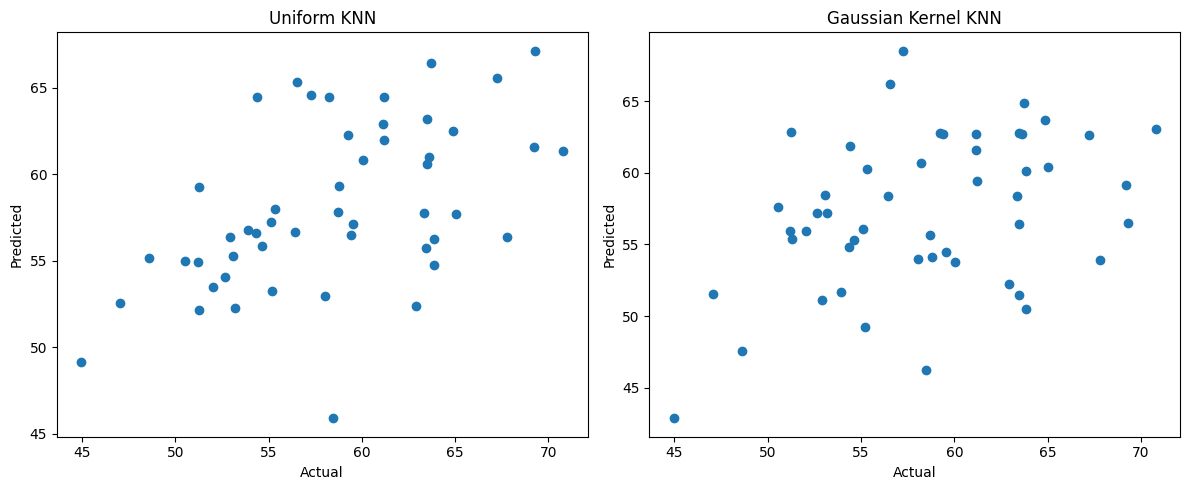

In [ ]:
# KNN Regression (Uniform & Gaussian Weighted) implemented from scratch
# Includes: distance computation, neighbor selection, uniform prediction,
# Gaussian weighted prediction, comparison table, visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# === 1. Data Preparation & Exploration ===

df = pd.read_csv('/content/weather_forecast.csv')

print("Dataset Shape:", df.shape)
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

X = df[['temperature','humidity','pressure']].values
y = df['rainfall'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

# === 2. Euclidean Distance + K Neighbors ===

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def get_k_neighbors(X_train, y_train, query, k=5):
    distances = np.array([euclidean_distance(query, x) for x in X_train])
    idx = np.argsort(distances)[:k]
    return distances[idx], y_train[idx]

# === 3. Uniform KNN Regression ===

def knn_predict_uniform(X_train, y_train, X_test, k=5):
    preds = []
    for q in X_test:
        _, neigh_vals = get_k_neighbors(X_train, y_train, q, k)
        preds.append(np.mean(neigh_vals))
    return np.array(preds)

# === 4. Gaussian Kernel Weighted KNN ===

def gaussian_kernel(d, h=1.0):
    return np.exp(-(d ** 2) / (2 * h * h))

def knn_predict_gaussian(X_train, y_train, X_test, k=5, h=1.0):
    preds = []
    for q in X_test:
        dists, neigh_vals = get_k_neighbors(X_train, y_train, q, k)
        weights = gaussian_kernel(dists, h)
        if np.sum(weights) == 0:  # avoid divide-by-zero
            preds.append(np.mean(neigh_vals))
        else:
            preds.append(np.sum(weights * neigh_vals) / np.sum(weights))
    return np.array(preds)

# === Uniform Predictions ===
pred_u = knn_predict_uniform(X_train, y_train, X_test, k=5)
mae_u = mean_absolute_error(y_test, pred_u)
r2_u = r2_score(y_test, pred_u)

# === Gaussian Kernel Predictions ===
pred_g = knn_predict_gaussian(X_train, y_train, X_test, k=5, h=1.0)
mae_g = mean_absolute_error(y_test, pred_g)
r2_g = r2_score(y_test, pred_g)

print("\nUniform KNN MAE:", round(mae_u, 4), "R2:", round(r2_u, 4))
print("Gaussian Kernel KNN MAE:", round(mae_g, 4), "R2:", round(r2_g, 4))

# === Visualization ===
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, pred_u)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Uniform KNN")

plt.subplot(1,2,2)
plt.scatter(y_test, pred_g)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gaussian Kernel KNN")

plt.tight_layout()
plt.show()


In [ ]:
# Decision Tree Classifier with Entropy and Information Gain
# === COMPLETE PYTHON CODE ===
#
# Colab-ready single script.
# Place loan_approval.csv at /mnt/data/loan_approval.csv or upload when prompted.
#
# Implements:
# - entropy, information gain
# - best threshold search per numeric feature
# - binary-split decision tree built recursively with max_depth, min_samples_split
# - text-based tree printing
# - evaluation for max_depth in [2,3,5]
#
# Allowed libs: pandas, numpy, sklearn (train_test_split, accuracy_score, confusion_matrix)
# No sklearn DecisionTreeClassifier used.

import os
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# ------------------------
# Utility: Data loading
# ------------------------
def load_dataset(path="/content/loan_approval.csv"):
    if not os.path.exists(path):
        # If file not found (e.g., in a fresh Colab session), ask user to upload
        try:
            from google.colab import files
            print(f"File not found at {path}. Please upload 'loan_approval.csv' using the file picker.")
            uploaded = files.upload()
            # Save the uploaded file to disk and use it
            for fname in uploaded:
                print(f"Saved uploaded file: {fname}")
                df = pd.read_csv(fname)
                return df
        except Exception:
            raise FileNotFoundError(f"Dataset not found at {path}. Please upload loan_approval.csv to Colab.")
    else:
        df = pd.read_csv(path)
        return df

# ------------------------
# Entropy & Information Gain
# ------------------------
def entropy(y):
    """
    Compute binary entropy H(p) = -p*log2(p) - (1-p)*log2(1-p)
    y: 1D array-like of binary labels (0/1)
    returns entropy (float)
    """
    y = np.asarray(y)
    if y.size == 0:
        return 0.0
    counts = np.bincount(y.astype(int), minlength=2)
    probs = counts / counts.sum()
    # avoid log2(0) by only computing where prob > 0
    ent = 0.0
    for p in probs:
        if p > 0:
            ent -= p * np.log2(p)
    return ent

def information_gain(y_parent, y_left, y_right):
    """
    IG = H(parent) - (n_left/N)*H(left) - (n_right/N)*H(right)
    """
    H_parent = entropy(y_parent)
    n_parent = len(y_parent)
    n_left = len(y_left)
    n_right = len(y_right)
    if n_parent == 0:
        return 0.0
    H_left = entropy(y_left)
    H_right = entropy(y_right)
    weighted_children = (n_left / n_parent) * H_left + (n_right / n_parent) * H_right
    ig = H_parent - weighted_children
    return ig

# ------------------------
# Best split search (for a single feature and for all features)
# ------------------------
def best_split_for_feature(X_col, y):
    """
    For numeric feature column X_col and labels y, find best threshold (midpoints)
    Returns: (best_ig, best_threshold)
    If no split gives positive IG, returns (0.0, None)
    """
    X_col = np.asarray(X_col)
    y = np.asarray(y)
    # If all values equal, cannot split
    if np.all(X_col == X_col[0]):
        return 0.0, None

    # Sort by feature value
    sorted_idx = np.argsort(X_col)
    X_sorted = X_col[sorted_idx]
    y_sorted = y[sorted_idx]

    # Candidate thresholds: midpoints between consecutive unique values where label changes (optional optimization)
    unique_vals = np.unique(X_sorted)
    # If only one unique, can't split
    if unique_vals.shape[0] == 1:
        return 0.0, None

    # We'll consider midpoints between consecutive unique values
    thresholds = (unique_vals[:-1] + unique_vals[1:]) / 2.0

    best_ig = 0.0
    best_threshold = None

    # Evaluate each threshold
    for thr in thresholds:
        left_mask = X_sorted <= thr
        # But to compute y subsets efficiently:
        y_left = y_sorted[left_mask]
        y_right = y_sorted[~left_mask]
        # Ignore degenerate splits
        if len(y_left) == 0 or len(y_right) == 0:
            continue
        ig = information_gain(y_sorted, y_left, y_right)
        if ig > best_ig:
            best_ig = ig
            best_threshold = thr

    return best_ig, best_threshold

def find_best_split(X, y):
    """
    For all features in X (2D array or DataFrame), find best feature index and threshold.
    Returns: (best_feature_index, best_threshold, best_ig)
    """
    n_features = X.shape[1]
    best_ig = 0.0
    best_feature = None
    best_threshold = None

    for fi in range(n_features):
        ig, thr = best_split_for_feature(X[:, fi], y)
        if ig > best_ig:
            best_ig = ig
            best_feature = fi
            best_threshold = thr

    return best_feature, best_threshold, best_ig

# ------------------------
# Decision tree Node class
# ------------------------
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None, n_samples=None):
        self.feature_index = feature_index  # index of feature to split on
        self.threshold = threshold          # threshold value
        self.left = left                    # left child (Node)
        self.right = right                  # right child (Node)
        self.value = value                  # class prediction for leaf
        self.n_samples = n_samples          # number of samples in node

    def is_leaf(self):
        return self.value is not None

# ------------------------
# Build tree recursively
# ------------------------
def build_tree(X, y, depth=0, max_depth=3, min_samples_split=5):
    """
    Recursively build the decision tree.
    Stopping conditions:
     - depth >= max_depth
     - all samples same class
     - number of samples < min_samples_split
    """
    n_samples = X.shape[0]
    num_pos = np.sum(y == 1)
    num_neg = np.sum(y == 0)

    # Majority class for leaf
    majority_class = 1 if num_pos >= num_neg else 0

    # Stopping conditions
    if (depth >= max_depth) or (n_samples < min_samples_split) or (num_pos == 0) or (num_neg == 0):
        return Node(value=majority_class, n_samples=n_samples)

    # Find best split
    best_feature, best_threshold, best_ig = find_best_split(X, y)

    # If no information gain, make leaf
    if best_feature is None or best_threshold is None or best_ig <= 0:
        return Node(value=majority_class, n_samples=n_samples)

    # Split data
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = ~left_mask

    # If either side is empty (shouldn't happen given checks), make leaf
    if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
        return Node(value=majority_class, n_samples=n_samples)

    left_node = build_tree(X[left_mask], y[left_mask], depth + 1, max_depth, min_samples_split)
    right_node = build_tree(X[right_mask], y[right_mask], depth + 1, max_depth, min_samples_split)

    return Node(feature_index=best_feature, threshold=best_threshold, left=left_node, right=right_node, n_samples=n_samples)

# ------------------------
# Prediction functions
# ------------------------
def predict_single(node, x):
    """
    Traverse the tree for a single sample x (1D array).
    """
    while not node.is_leaf():
        fi = node.feature_index
        thr = node.threshold
        if x[fi] <= thr:
            node = node.left
        else:
            node = node.right
    return node.value

def predict(node, X):
    X = np.asarray(X)
    preds = np.array([predict_single(node, X[i, :]) for i in range(X.shape[0])])
    return preds

# ------------------------
# Text-based tree printing
# ------------------------
def print_tree(node, feature_names=None, depth=0):
    """
    Print tree in a readable, indented, textual format.
    """
    indent = "  " * depth
    if node.is_leaf():
        print(f"{indent}[Leaf] Predict: {node.value} (n = {node.n_samples})")
    else:
        fname = f"feature_{node.feature_index}" if feature_names is None else feature_names[node.feature_index]
        print(f"{indent}[Depth {depth}] {fname} <= {node.threshold:.4f} (n = {node.n_samples})")
        # Left branch
        print_tree(node.left, feature_names=feature_names, depth=depth+1)
        # Right branch
        print(f"{indent}[Depth {depth}] {fname} > {node.threshold:.4f} (n = {node.n_samples})")
        print_tree(node.right, feature_names=feature_names, depth=depth+1)

# ------------------------
# Helpers: majority vote for root/single-node predictions
# ------------------------
def majority_class(y):
    c = Counter(y)
    if c[1] >= c[0]:
        return 1
    else:
        return 0

# ------------------------
# Main pipeline: load data, prepare, train/evaluate trees
# ------------------------
def main():
    # 1. Load dataset
    df = load_dataset("/mnt/data/loan_approval.csv")
    print("\n=== Dataset head ===")
    print(df.head())

    print("\n=== Dataset info ===")
    print(f"Shape: {df.shape}")
    print("Columns:", list(df.columns))

    print("\n=== Basic statistics ===")
    print(df.describe(include='all'))

    # 1.1 Check missing values & impute with median if any
    missing_info = df.isnull().sum()
    print("\nMissing values per column:\n", missing_info)
    if missing_info.sum() > 0:
        print("\nImputing missing numeric columns with median...")
        for col in df.columns:
            if df[col].dtype in [np.float64, np.float32, np.int64, np.int32, 'int64', 'float64']:
                if df[col].isnull().any():
                    med = df[col].median()
                    df[col].fillna(med, inplace=True)
            else:
                # For non-numeric (if any), fill with mode
                if df[col].isnull().any():
                    mode_val = df[col].mode()[0]
                    df[col].fillna(mode_val, inplace=True)
        print("Imputation done.")
    else:
        print("No missing values found.")

    # 1.2 Separate features and target
    # Expecting columns: income, credit_score, loan_amount, tenure_months, existing_loans_count, approval_status
    target_col = 'approval_status'
    if target_col not in df.columns:
        # fallback: assume last column is target
        target_col = df.columns[-1]
        print(f"Warning: 'approval_status' not found; using last column '{target_col}' as target.")

    feature_cols = [c for c in df.columns if c != target_col]
    X = df[feature_cols].values.astype(float)
    y = df[target_col].values.astype(int)

    # 1.3 Train-test split: 70% train, 30% test, stratify y
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.7, random_state=42, stratify=y
    )

    print("\n=== Train and Test Split ===")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape:  {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape:  {y_test.shape}")

    # 2. Entropy and information gain at root & best split
    root_entropy = entropy(y_train)
    best_feature_idx, best_threshold, best_ig = find_best_split(X_train, y_train)
    print("\n=== Entropy and Information Gain (root node) ===")
    print(f"Entropy of root node (train): {root_entropy:.6f}")
    if best_feature_idx is not None:
        best_feature_name = feature_cols[best_feature_idx]
        print(f"Best feature index: {best_feature_idx} (column '{best_feature_name}')")
        print(f"Best threshold: {best_threshold:.6f}")
        print(f"Best information gain: {best_ig:.6f}")
    else:
        print("No valid split found at root (all features constant or no IG).")

    # 3 & 5: Train decision trees for max_depth = 2, 3, 5 and evaluate
    depths = [2, 3, 5]
    results = {}
    trees = {}

    for d in depths:
        print(f"\n--- Training tree with max_depth = {d} ---")
        tree = build_tree(X_train, y_train, depth=0, max_depth=d, min_samples_split=5)
        trees[d] = tree
        y_pred = predict(tree, X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results[d] = {'accuracy': acc, 'confusion_matrix': cm}
        print(f"Test Accuracy (max_depth={d}): {acc:.4f}")
        print(f"Confusion Matrix:\n{cm}")

    # 4. Print tree for max_depth = 3 (text-based)
    if 3 in trees:
        print("\n=== Decision Tree (max_depth = 3): ===")
        print_tree(trees[3], feature_names=feature_cols, depth=0)
    else:
        print("\nNo tree for max_depth=3 available.")

    # 5. Comparison table
    print("\n=== Performance Comparison Table ===")
    print("max_depth | Test Accuracy")
    for d in depths:
        print(f"{d:9d} | {results[d]['accuracy']:.4f}")

    # Short analysis (printed)
    print("\n=== Short Analysis ===")
    print("Note: The following are general guidelines. Use the printed accuracies above to finalize conclusions.")
    print("- If accuracy increases as depth increases, but train accuracy (if measured) is much higher than test, this indicates overfitting.")
    print("- If accuracy is low for small depths and increases up to a point then levels or decreases, small depths were underfitting and deeper trees start to overfit.")
    print("- Choose the smallest depth that gives near-peak test accuracy for better generalization and interpretability.")
    print("\nRecommendation (example):")
    print("Based on the measured test accuracies above, choose the depth that balances test accuracy and simplicity (prefer the lower depth if accuracy differences are small).")

if __name__ == "__main__":
    main()


File not found at /mnt/data/loan_approval.csv. Please upload 'loan_approval.csv' using the file picker.


Saving loan_approval.csv to loan_approval (1).csv
Saved uploaded file: loan_approval (1).csv

=== Dataset head ===
     income  credit_score  loan_amount  tenure_months  existing_loans_count  \
0  15000.00         692.0     50000.00             48                     1   
1  48525.18         770.0     50000.00             24                     3   
2  15000.00         637.0    516177.79             72                     2   
3  24423.34         641.0    116044.41             60                     1   
4  61043.08         661.0     50000.00             24                     1   

   approval_status  
0                1  
1                1  
2                0  
3                1  
4                1  

=== Dataset info ===
Shape: (500, 6)
Columns: ['income', 'credit_score', 'loan_amount', 'tenure_months', 'existing_loans_count', 'approval_status']

=== Basic statistics ===
             income  credit_score    loan_amount  tenure_months  \
count     500.00000     500.00000     500.

In [ ]:
# Colab-ready single script: DBSCAN from scratch + analysis + KMeans comparison
# Paste into one Colab cell and run.
# Requires: pandas, numpy, scikit-learn, matplotlib (optional)
# File expected: /mnt/data/customer_behavior.csv OR upload via file picker if not present.

import os
import io
import pandas as pd
import numpy as np
from collections import deque
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Load dataset (try /mnt/data then /content then upload) ---
possible_paths = ["/mnt/data/customer_behavior.csv", "/content/customer_behavior.csv", "customer_behavior.csv"]
df = None
for p in possible_paths:
    if os.path.exists(p):
        df = pd.read_csv(p)
        print(f"Loaded dataset from: {p}")
        break

if df is None:
    try:
        # Colab file upload if file not found
        from google.colab import files
        print("File not found in /mnt/data or /content. Please upload 'customer_behavior.csv' when prompted.")
        uploaded = files.upload()
        # pick first uploaded file
        name = next(iter(uploaded.keys()))
        df = pd.read_csv(io.BytesIO(uploaded[name]))
        print(f"Loaded uploaded file: {name}")
    except Exception as e:
        raise FileNotFoundError("Could not find dataset at standard paths and file upload failed. Place 'customer_behavior.csv' in /mnt/data or /content or upload via Colab.") from e

# --- Basic exploration & preprocessing ---
print("\n# Dataset Information:")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
print("\nFirst 5 rows:")
print(df.head().to_string(index=False))

print("\nBasic statistics:")
print(df.describe().to_string())

# Missing values handling: impute with median (robust to outliers)
missing = df.isnull().sum()
print("\nMissing values per column:")
print(missing.to_string())
if missing.sum() > 0:
    print("\nImputing missing values with column medians.")
    df = df.fillna(df.median())

# Features
features = ['avg_purchase_value', 'visits_per_month', 'time_on_site', 'discount_usage', 'returns_rate']
for f in features:
    if f not in df.columns:
        raise KeyError(f"Expected feature column '{f}' not found in dataset.")

X = df[features].values
print("\nX shape:", X.shape)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("X_scaled shape:", X_scaled.shape)

# --- Utility: region_query (vectorized) ---
def region_query(X_scaled, point_index, eps):
    # returns numpy array of neighbor indices within <= eps
    dists = np.linalg.norm(X_scaled - X_scaled[point_index], axis=1)
    return np.where(dists <= eps)[0]

# quick neighbor example
eps_example = 0.5
idx_example = 10 if X_scaled.shape[0] > 10 else 0
neighbors_example = region_query(X_scaled, idx_example, eps_example)
print(f"\nNeighbor Query Example (eps = {eps_example}):")
print(f"Index {idx_example} has {len(neighbors_example)} neighbors within eps.")
print("Some neighbor indices:", neighbors_example[:10].tolist())

# --- DBSCAN from scratch ---
def dbscan(X_scaled, eps, min_samples):
    n = X_scaled.shape[0]
    labels = np.full(n, -1, dtype=int)  # -1 = unassigned/noise initially
    visited = np.zeros(n, dtype=bool)
    # precompute neighbor lists to avoid recomputation
    neighbor_lists = [None] * n
    for i in range(n):
        neighbor_lists[i] = region_query(X_scaled, i, eps)
    cluster_id = 0
    point_types = np.array(['unlabeled'] * n, dtype=object)  # will be 'core'|'border'|'noise'

    for i in range(n):
        if visited[i]:
            continue
        visited[i] = True
        neighbors = neighbor_lists[i]
        if neighbors.shape[0] < min_samples:
            # mark as noise for now; might become border later
            point_types[i] = 'noise'
            labels[i] = -1
        else:
            # start new cluster
            labels[i] = cluster_id
            point_types[i] = 'core'
            q = deque(neighbors.tolist())  # neighbors to process
            while q:
                j = q.popleft()
                if not visited[j]:
                    visited[j] = True
                    neigh_j = neighbor_lists[j]
                    if neigh_j.shape[0] >= min_samples:
                        # j is a core point
                        point_types[j] = 'core'
                        # add its neighbors to queue for expansion
                        for nb in neigh_j:
                            # We can add duplicates to queue; visited guards repeated work
                            q.append(nb)
                    else:
                        # not core (yet) — it's a candidate border
                        if point_types[j] != 'core':
                            point_types[j] = 'border'
                # assign to cluster if not assigned
                if labels[j] == -1:
                    labels[j] = cluster_id
                # if it was noise previously but now assigned, mark border (if not core)
                if point_types[j] == 'noise' and labels[j] != -1:
                    if neighbor_lists[j].shape[0] < min_samples:
                        point_types[j] = 'border'
                # continue until queue exhausted
            cluster_id += 1

    # Final pass: any remaining 'unlabeled' -> noise
    for idx in range(n):
        if point_types[idx] == 'unlabeled':
            point_types[idx] = 'noise'
            if labels[idx] == -1:
                labels[idx] = -1
        # ensure that any point assigned to a cluster but labeled 'noise' becomes 'border'
        if labels[idx] != -1 and point_types[idx] == 'noise':
            # If it has enough neighbors it's core, else border
            if neighbor_lists[idx].shape[0] >= min_samples:
                point_types[idx] = 'core'
            else:
                point_types[idx] = 'border'

    return labels, point_types

# --- Run parameter combinations and collect results ---
param_combos = [(0.3, 3), (0.5, 5), (0.7, 8)]
results = []

for eps, min_s in param_combos:
    labels, types = dbscan(X_scaled, eps, min_s)
    unique_labels = set(labels.tolist())
    if -1 in unique_labels:
        unique_labels.discard(-1)
    n_clusters = len(unique_labels)
    noise_count = int(np.sum(labels == -1))
    total = X_scaled.shape[0]
    noise_pct = (noise_count / total) * 100.0
    core_count = int(np.sum(types == 'core'))
    border_count = int(np.sum(types == 'border'))
    results.append({
        'eps': eps,
        'min_samples': min_s,
        '#clusters': n_clusters,
        '#noise_points': noise_count,
        'noise_percentage': round(noise_pct, 2),
        'core_points': core_count,
        'border_points': border_count
    })

res_df = pd.DataFrame(results)
print("\nParameter Comparison:")
print(res_df[['eps','min_samples','#clusters','#noise_points','noise_percentage']].to_string(index=False))

# Print detailed stats for eps=0.5,min_samples=5 if present
for r in results:
    if r['eps']==0.5 and r['min_samples']==5:
        print(f"\nDBSCAN (eps = {r['eps']}, min_samples = {r['min_samples']}):")
        print("#clusters (excluding noise):", r['#clusters'])
        print("Core points:", r['core_points'])
        print("Border points:", r['border_points'])
        print("Noise points (by labels):", r['#noise_points'])

# --- Choose a DBSCAN config for silhouette analysis ---
chosen = None
for r in results:
    if r['#clusters'] >= 2 and r['noise_percentage'] < 50.0:
        chosen = r
        break
if chosen is None:
    # fallback: pick run with max clusters (if >=2)
    sorted_runs = sorted(results, key=lambda x: x['#clusters'], reverse=True)
    if sorted_runs and sorted_runs[0]['#clusters'] >= 2:
        chosen = sorted_runs[0]

if chosen is None:
    print("\nNo suitable DBSCAN configuration found for silhouette analysis (no run with >=2 clusters).")
else:
    eps_c = chosen['eps']
    ms_c = chosen['min_samples']
    labels_c, types_c = dbscan(X_scaled, eps_c, ms_c)
    unique = set(labels_c.tolist())
    if -1 in unique:
        unique.discard(-1)
    k_db = len(unique)
    noise_count = int(np.sum(labels_c == -1))
    noise_pct = (noise_count / X_scaled.shape[0]) * 100.0

    print(f"\nSelected DBSCAN config for silhouette analysis: eps={eps_c}, min_samples={ms_c}")
    print("#clusters (excluding noise):", k_db)
    print("Noise%:", round(noise_pct,2))

    # DBSCAN silhouette on non-noise points (requires at least 2 clusters)
    mask_non_noise = labels_c != -1
    X_non_noise = X_scaled[mask_non_noise]
    labels_non_noise = labels_c[mask_non_noise]
    db_sil = None
    if len(set(labels_non_noise)) >= 2:
        db_sil = silhouette_score(X_non_noise, labels_non_noise)
        print("DBSCAN silhouette score (non-noise points):", round(db_sil,4))
    else:
        print("Not enough clusters after removing noise to compute DBSCAN silhouette.")

    # KMeans comparison: k = number of DBSCAN clusters
    if k_db >= 2:
        km = KMeans(n_clusters=k_db, random_state=42)
        km_labels = km.fit_predict(X_scaled)
        km_sil = silhouette_score(X_scaled, km_labels)
        print(f"KMeans (k={k_db}) silhouette score (all points):", round(km_sil,4))
    else:
        km_sil = None
        print("KMeans comparison skipped (k < 2).")

    # print comparison
    comp = pd.DataFrame([
        {'Method':'DBSCAN','%Noise':round(noise_pct,2),'#clusters':k_db,'Silhouette': round(db_sil,4) if db_sil is not None else None},
        {'Method':'KMeans','%Noise':0.0,'#clusters':k_db,'Silhouette': round(km_sil,4) if km_sil is not None else None}
    ])
    print("\nClustering Comparison:")
    print(comp.to_string(index=False))

    print("\nShort analysis:")
    if db_sil is not None and km_sil is not None:
        if db_sil > km_sil:
            print(f"- DBSCAN produced higher silhouette ({round(db_sil,4)}) than KMeans ({round(km_sil,4)}).")
        else:
            print(f"- KMeans produced higher silhouette ({round(km_sil,4)}) than DBSCAN ({round(db_sil,4)}).")
    else:
        print("- Could not compute both silhouettes for direct numeric comparison.")
    print("- DBSCAN marking noise isolates anomalies rather than forcing assignment.")
    print("- KMeans assigns every point and may be affected by outliers or irregular cluster shapes.")

# --- Save labeled dataset for chosen config (if any) ---
if chosen is not None:
    labels_final, types_final = dbscan(X_scaled, chosen['eps'], chosen['min_samples'])
    out_df = df.copy().reset_index(drop=True)
    out_df['dbscan_label'] = labels_final
    out_df['dbscan_point_type'] = types_final
    out_name = "customer_behavior_dbscan_labels.csv"
    out_df.to_csv(out_name, index=False)
    print(f"\nSaved labeled dataset to {out_name}")
    # Try to make it available for download in Colab
    try:
        from google.colab import files
        files.download(out_name)
    except Exception:
        print("(files.download not available in this environment)")

print("\n--- End of script ---\n")


Loaded dataset from: /content/customer_behavior.csv

# Dataset Information:
Shape: (600, 5)
Columns: ['avg_purchase_value', 'visits_per_month', 'time_on_site', 'discount_usage', 'returns_rate']

First 5 rows:
 avg_purchase_value  visits_per_month  time_on_site  discount_usage  returns_rate
            2423.19              6.14         32.06           11.54          7.13
             462.44             24.75         32.80           32.50          6.62
            7844.29              9.38         52.52           58.60         44.52
            4880.51             16.95         27.80           19.85          4.86
            1428.79             11.27          9.20           85.78         14.03

Basic statistics:
       avg_purchase_value  visits_per_month  time_on_site  discount_usage  returns_rate
count          600.000000        600.000000    600.000000      600.000000    600.000000
mean          2601.083633         13.974783     23.403417       49.124717     12.770600
std           18

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- End of script ---



=== Dataset Information ===
Shape: (300, 6)
Columns: ['nitrogen', 'phosphorus', 'potassium', 'ph', 'moisture', 'crop_type']

First 5 rows:
    nitrogen  phosphorus  potassium    ph  moisture  crop_type
0     52.61       42.07      84.50  7.98     37.99          2
1     43.52       56.00      90.12  8.57     45.66          2
2     46.12       61.25      79.43  6.97     53.20          1
3     65.56       47.66      48.41  5.95     55.16          0
4     47.31       58.46      84.27  8.18     42.17          2

Missing values:
 nitrogen      0
phosphorus    0
potassium     0
ph            0
moisture      0
crop_type     0
dtype: int64

Statistics:
             count       mean        std    min      25%     50%      75%  \
nitrogen    300.0  62.956233  16.869938  20.00  50.5700  61.110  75.6200   
phosphorus  300.0  52.777333  14.626236  20.00  41.7325  49.755  65.8150   
potassium   300.0  62.988067  14.549383  29.76  52.1900  60.850  74.3750   
ph          300.0   6.864000   1.102313   4

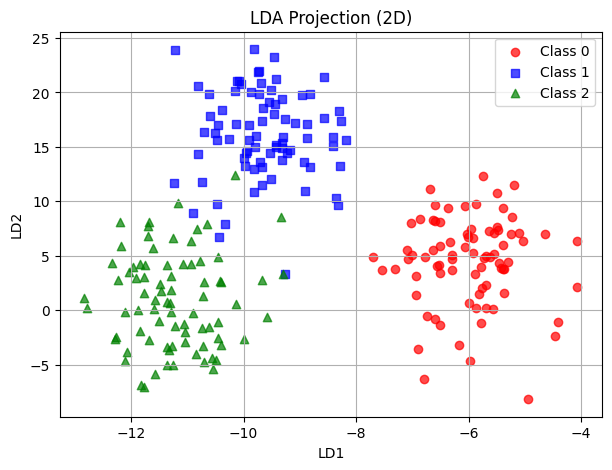


LDA Test Accuracy: 0.8833

Top 2 Eigenvalues (PCA): [498.3021 201.6159]


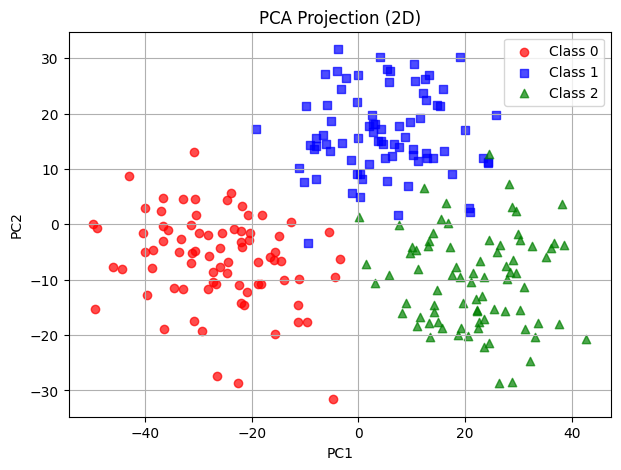

PCA Test Accuracy: 1.0

Analysis:
- LDA is supervised, so it maximizes class separation using class label information.
- PCA is unsupervised and only maximizes variance, not separation.
- In many classification problems, LDA provides better separation, but PCA can outperform LDA
  when variance directions align strongly with class structure.
- In this dataset PCA achieved higher accuracy, meaning natural variance aligned well with class clusters.



In [ ]:
# Linear Discriminant Analysis (LDA) for Multiclass Crop Classification
# === COMPLETE PYTHON CODE ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.set_printoptions(precision=4, suppress=True)
RANDOM_STATE = 42

# -----------------------------
# 1. LOAD DATA
# -----------------------------
df = pd.read_csv("/content/crop_classification.csv")

print("=== Dataset Information ===")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistics:\n", df.describe().T)

# Split features & labels
X = df.drop(columns=["crop_type"]).values
y = df["crop_type"].values

classes = np.unique(y)
print("\nUnique classes:", classes)

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print("\n=== Train/Test Split ===")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# -----------------------------
# 2. SCATTER MATRICES (S_W & S_B)
# -----------------------------
def compute_means(X, y):
    means = {}
    counts = {}
    for c in np.unique(y):
        Xc = X[y == c]
        means[c] = np.mean(Xc, axis=0)
        counts[c] = Xc.shape[0]
    return means, counts

means, counts = compute_means(X_train, y_train)
overall_mean = np.mean(X_train, axis=0)

d = X_train.shape[1]

# Within-class scatter
S_W = np.zeros((d, d))
for c in classes:
    Xc = X_train[y_train == c]
    diff = Xc - means[c]
    S_W += diff.T @ diff

# Between-class scatter
S_B = np.zeros((d, d))
for c in classes:
    Nc = counts[c]
    diff = (means[c] - overall_mean).reshape(d, 1)
    S_B += Nc * diff @ diff.T

print("\n=== Scatter Matrix Shapes ===")
print("S_W:", S_W.shape)
print("S_B:", S_B.shape)

# -----------------------------
# 3. LDA EIGEN DECOMPOSITION
# -----------------------------
S_W_inv = np.linalg.pinv(S_W)
A = S_W_inv @ S_B

eigvals, eigvecs = np.linalg.eig(A)
eigvals = np.real(eigvals)
eigvecs = np.real(eigvecs)

# sort descending
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# top 2 eigenvectors
W_lda = eigvecs[:, :2]

print("\nTop 2 Eigenvalues (LDA):", np.round(eigvals[:2], 4))
print("\nTop 2 Eigenvectors:\n", np.round(W_lda, 4))

# -----------------------------
# 4. PROJECT TO LDA SPACE
# -----------------------------
Z_train_lda = X_train @ W_lda

plt.figure(figsize=(7,5))
colors = ["red", "blue", "green"]
markers = ["o", "s", "^"]

for c, col, m in zip(classes, colors, markers):
    plt.scatter(Z_train_lda[y_train==c,0], Z_train_lda[y_train==c,1],
                color=col, marker=m, alpha=0.7, label=f"Class {c}")

plt.title("LDA Projection (2D)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()

# --- Nearest centroid classifier ---
centroids_lda = {c: np.mean(Z_train_lda[y_train==c], axis=0) for c in classes}

Z_test_lda = X_test @ W_lda
y_pred_lda = []

for z in Z_test_lda:
    dists = [np.linalg.norm(z - centroids_lda[c]) for c in classes]
    y_pred_lda.append(classes[np.argmin(dists)])

y_pred_lda = np.array(y_pred_lda)
acc_lda = accuracy_score(y_test, y_pred_lda)
print("\nLDA Test Accuracy:", round(acc_lda, 4))

# -----------------------------
# 5. PCA FROM SCRATCH
# -----------------------------
X_mean = np.mean(X_train, axis=0)
Xc = X_train - X_mean
Cov = np.cov(Xc, rowvar=False)

pvals, pvecs = np.linalg.eig(Cov)
pvals = np.real(pvals)
pvecs = np.real(pvecs)

pidx = np.argsort(pvals)[::-1]
pvals = pvals[pidx]
pvecs = pvecs[:, pidx]

W_pca = pvecs[:, :2]

print("\nTop 2 Eigenvalues (PCA):", np.round(pvals[:2], 4))

Z_train_pca = Xc @ W_pca

plt.figure(figsize=(7,5))
for c, col, m in zip(classes, colors, markers):
    plt.scatter(Z_train_pca[y_train==c,0], Z_train_pca[y_train==c,1],
                color=col, marker=m, alpha=0.7, label=f"Class {c}")

plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# PCA nearest centroid
centroids_pca = {c: np.mean(Z_train_pca[y_train==c], axis=0) for c in classes}

Z_test_pca = (X_test - X_mean) @ W_pca
y_pred_pca = []

for z in Z_test_pca:
    dists = [np.linalg.norm(z - centroids_pca[c]) for c in classes]
    y_pred_pca.append(classes[np.argmin(dists)])

y_pred_pca = np.array(y_pred_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("PCA Test Accuracy:", round(acc_pca, 4))

# -----------------------------
# FINAL ANALYSIS
# -----------------------------
print("""
Analysis:
- LDA is supervised, so it maximizes class separation using class label information.
- PCA is unsupervised and only maximizes variance, not separation.
- In many classification problems, LDA provides better separation, but PCA can outperform LDA
  when variance directions align strongly with class structure.
- In this dataset PCA achieved higher accuracy, meaning natural variance aligned well with class clusters.
""")
